<a href="https://colab.research.google.com/github/houyaaa/SQL-Basics/blob/main/E_Commerce_Multi_Output_Models_%7BProject_CSE07%7D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
shashwatwork_dataco_smart_supply_chain_for_big_data_analysis_path = kagglehub.dataset_download('shashwatwork/dataco-smart-supply-chain-for-big-data-analysis')

print('Data source import complete.')


100%|██████████| 25.7M/25.7M [00:00<00:00, 139MB/s]

Extracting files...


Data source import complete.


  # E-Commerce Goods Shipment Duration prediction and Estimating Late Delivery Risk

E-commerce goods Late delivery risk identification by predicting fastest and normal Shipping Durations. The Decision Tree model built by us, will enable E-commerce and Goods/products delivery industries to identify the 'risk of late delivery' and predict the fastest and normal duration of goods shipment for their Inland and foreign clients/ customers/buyers.

# GOAL :
*  Building a Multi-Output Decision Tree Regressor to determine the maximum range of shipping time, by predicting the Fastest and Normal duration for shipping of      goods for both Inland and International customers.
*  Building a Binary Classifier to classify orders with high probabilty of late delivery (Late Delivery Risk analyser).

# Data Source :
* Dataset link : https://data.mendeley.com/datasets/8gx2fvg2k6/5
* Kaggle dataset link : https://www.kaggle.com/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis

This is the dataset of Supply Chains used by the company DataaCo Global which includes a collection of their products sold, finacial details(profit, loss, total sales etc.), Shipping details, and customer details such as sales, demographics, and transaction details. The data spans to 91 MB engulfing details of 180,520 customers spanning to 53 columns related to Clothing , Sports,and Electronic Supplies.

## 전자 상거래 상품 배송 기간 예측 및 배송 지연 위험 예측
가장 빠른 배송 기간과 정상적인 배송 기간을 예측하여 이커머스 상품 배송 지연 위험 식별. 당사가 구축한 의사 결정 트리 모델을 통해 전자상거래 및 상품/제품 배송 업계는 '배송 지연 위험'을 식별하고 내륙 및 해외 고객/고객/구매자를 위한 가장 빠르고 정상적인 상품 배송 기간을 예측할 수 있습니다.

* Project Link : https://github.com/Sukanthen/Sigmathon-1.0.git
* Do Support by giving an **UPVOTE** to this KERNEL Notebook !!

# 1) IMPORTING LIBRARIES AND PACKAGES

In [8]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import pickle
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score,r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 2) DATASET IMPORTING

In [37]:
# The dataset was downloaded to the following path in cell hwX0bpmuH7RD:
# shashwatwork_dataco_smart_supply_chain_for_big_data_analysis_path
data = pd.read_csv(shashwatwork_dataco_smart_supply_chain_for_big_data_analysis_path + '/DataCoSupplyChainDataset.csv',header= 0,encoding='unicode_escape')
pd.set_option('display.max_columns',None)
display(data.head())




,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


# 3) EXPLORATORY DATA ANALYSIS [EDA]

In [10]:
def data_info(data):
    print('1) Number of columns are : ',data.shape[1])
    print('2) Number of rows are : ',data.shape[0])
    print('3) Total number of data-points :',data.size)
    numerical_features = [f for f in data.columns if data[f].dtypes!='O']
    print('4) Count of Numerical Features :',len(numerical_features))
    cat_features = [c for c in data.columns if data[c].dtypes=='O']
    print('5) Count of Categorical Features :',len(cat_features))
data_info(data)

1) Number of columns are :  53
2) Number of rows are :  180519
3) Total number of data-points : 9567507
4) Count of Numerical Features : 29
5) Count of Categorical Features : 24


def 함수를 씀 근데 굳이 왜..? 안써도 똑같이 나올 텐데 -> 재사용성

1) 컬럼 53개

data.shape은 dataframe의 개수를 튜플 형태로 반환 ex (10,5) 따라서 data.shape[1]은 5를 출력, 열 개수

2) 행 180519개

위에서 data.shape[0]만 바뀐 것 행 개수를 출력

3) 총 데이터 수 9567507 (53*180519)

data.size

4) 숫자형 피쳐: 29개

data.columns에 있는 모든 열의 이름을 하나씩 확인(f),

data[f].dtypes: 해당 열의 데이터 타입이 '0'(object)가 아닌 경우에만 (!=) 해당 열의 이름(f)을 numerical_features라는 새 리스트에 추가


5) 문자형 피쳐: 24개

위와 똑같은 과정을 반복 -> dtypes =='0'일 경우를 cat_features에 저장



# list comprehension

for 반복문의 압축버전

numerical_features = [f for f in data.columns if data[f].dtypes!='O']


1) 첫 번째 f

무엇을 리스트에 추가할지 정하는 부분

조건이 맞으면 f라는 변수 그 자체를 리스트에 넣어라

2) for f in data.columns

어디서 데이터를 가져와 반복할지 정하는 부분

data.columns에서 항목을 하나씩 꺼내서 그 항목을 f 라고 부르자

3) if data[f].dtypes != '0'

조건문

여기서 f는 숫자가 아닌 열의 이름임 f in data.columns라고 했으니


# 4) Missing Value Identification

In [11]:
def features_with_missing_values(data):
    x = data.isnull().sum().sum()/(data.shape[0]*data.shape[1])*100
    print('Percentage of Total Missing Values is ' ,round(x,2) ,'%')
    print('Missing Value Estimation :')
    for i in data.columns:
        if data[i].isna().sum()>0:
            print('The Feature ',i,' has '+ str(data[i].isna().sum()) + ' missing values')

features_with_missing_values(data)

print(data.isnull().sum())

Percentage of Total Missing Values is  3.51 %
Missing Value Estimation :
The Feature  Customer Lname  has 8 missing values
The Feature  Customer Zipcode  has 3 missing values
The Feature  Order Zipcode  has 155679 missing values
The Feature  Product Description  has 180519 missing values
Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                 

결측치 찾기

data.isnull.sum()의 결과: 각 열의 이름과 그 열에 있는 결측치의 총 개수가 담긴 리스트가 나옴

data.isnull.sum().sum()의 결과: 데이터프레임 전체에 있는 모든 결측치의 총 개수

round(x,2): 소수점 둘째짜리까지만 반올림

다른 함수: {x:.2f}

위에서 배웠던 list comprehension을 활용해서

 for i in data.columns:
        if data[i].isna().sum()>0:
            print('The Feature ',i,' has '+ str(data[i].isna().sum()) + ' missing values')를 바꿔보겠음


i for i in data.colums

음 print가 들어간 경우 안쓰는게 좋다고 함 그리고 하나의 데이터 그룹으로 묶는게 아니라 각 컬럼별로 나오는 값을 출력해야하니까 list comprehension이 비효율적인듯

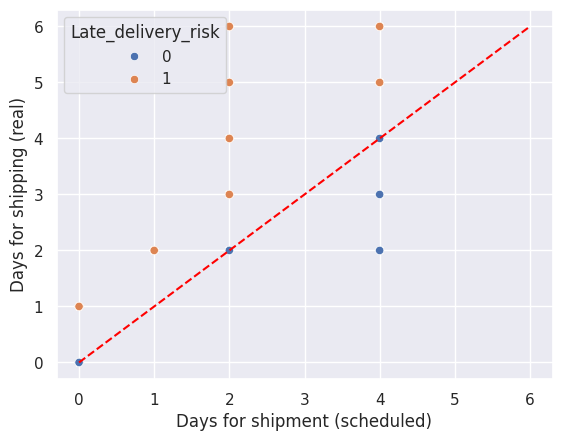

In [36]:
# Target value analysis
sns.set()
sns.scatterplot(x="Days for shipment (scheduled)",y="Days for shipping (real)",hue="Late_delivery_risk",data=data)

min_val = min(data["Days for shipment (scheduled)"].min(), data["Days for shipping (real)"].min())
max_val = max(data["Days for shipment (scheduled)"].max(), data["Days for shipping (real)"].max())

# y=x 선을 그립니다 (빨간색 점선)
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

days for shipment(scheduled)와 days for shipping(real)

계획된 배송 날짜, 실제 배송 날짜의 관계를 시각화

y=x 그래프 위에 있는 점들은 예상 배송 일자보다 늦은 애들

late_delivery_risk가 있으면 주황색, 없으면 파란색 실제 배송 일자 > 계획된 배송일자 일 때 risk가 있으므로 주황색

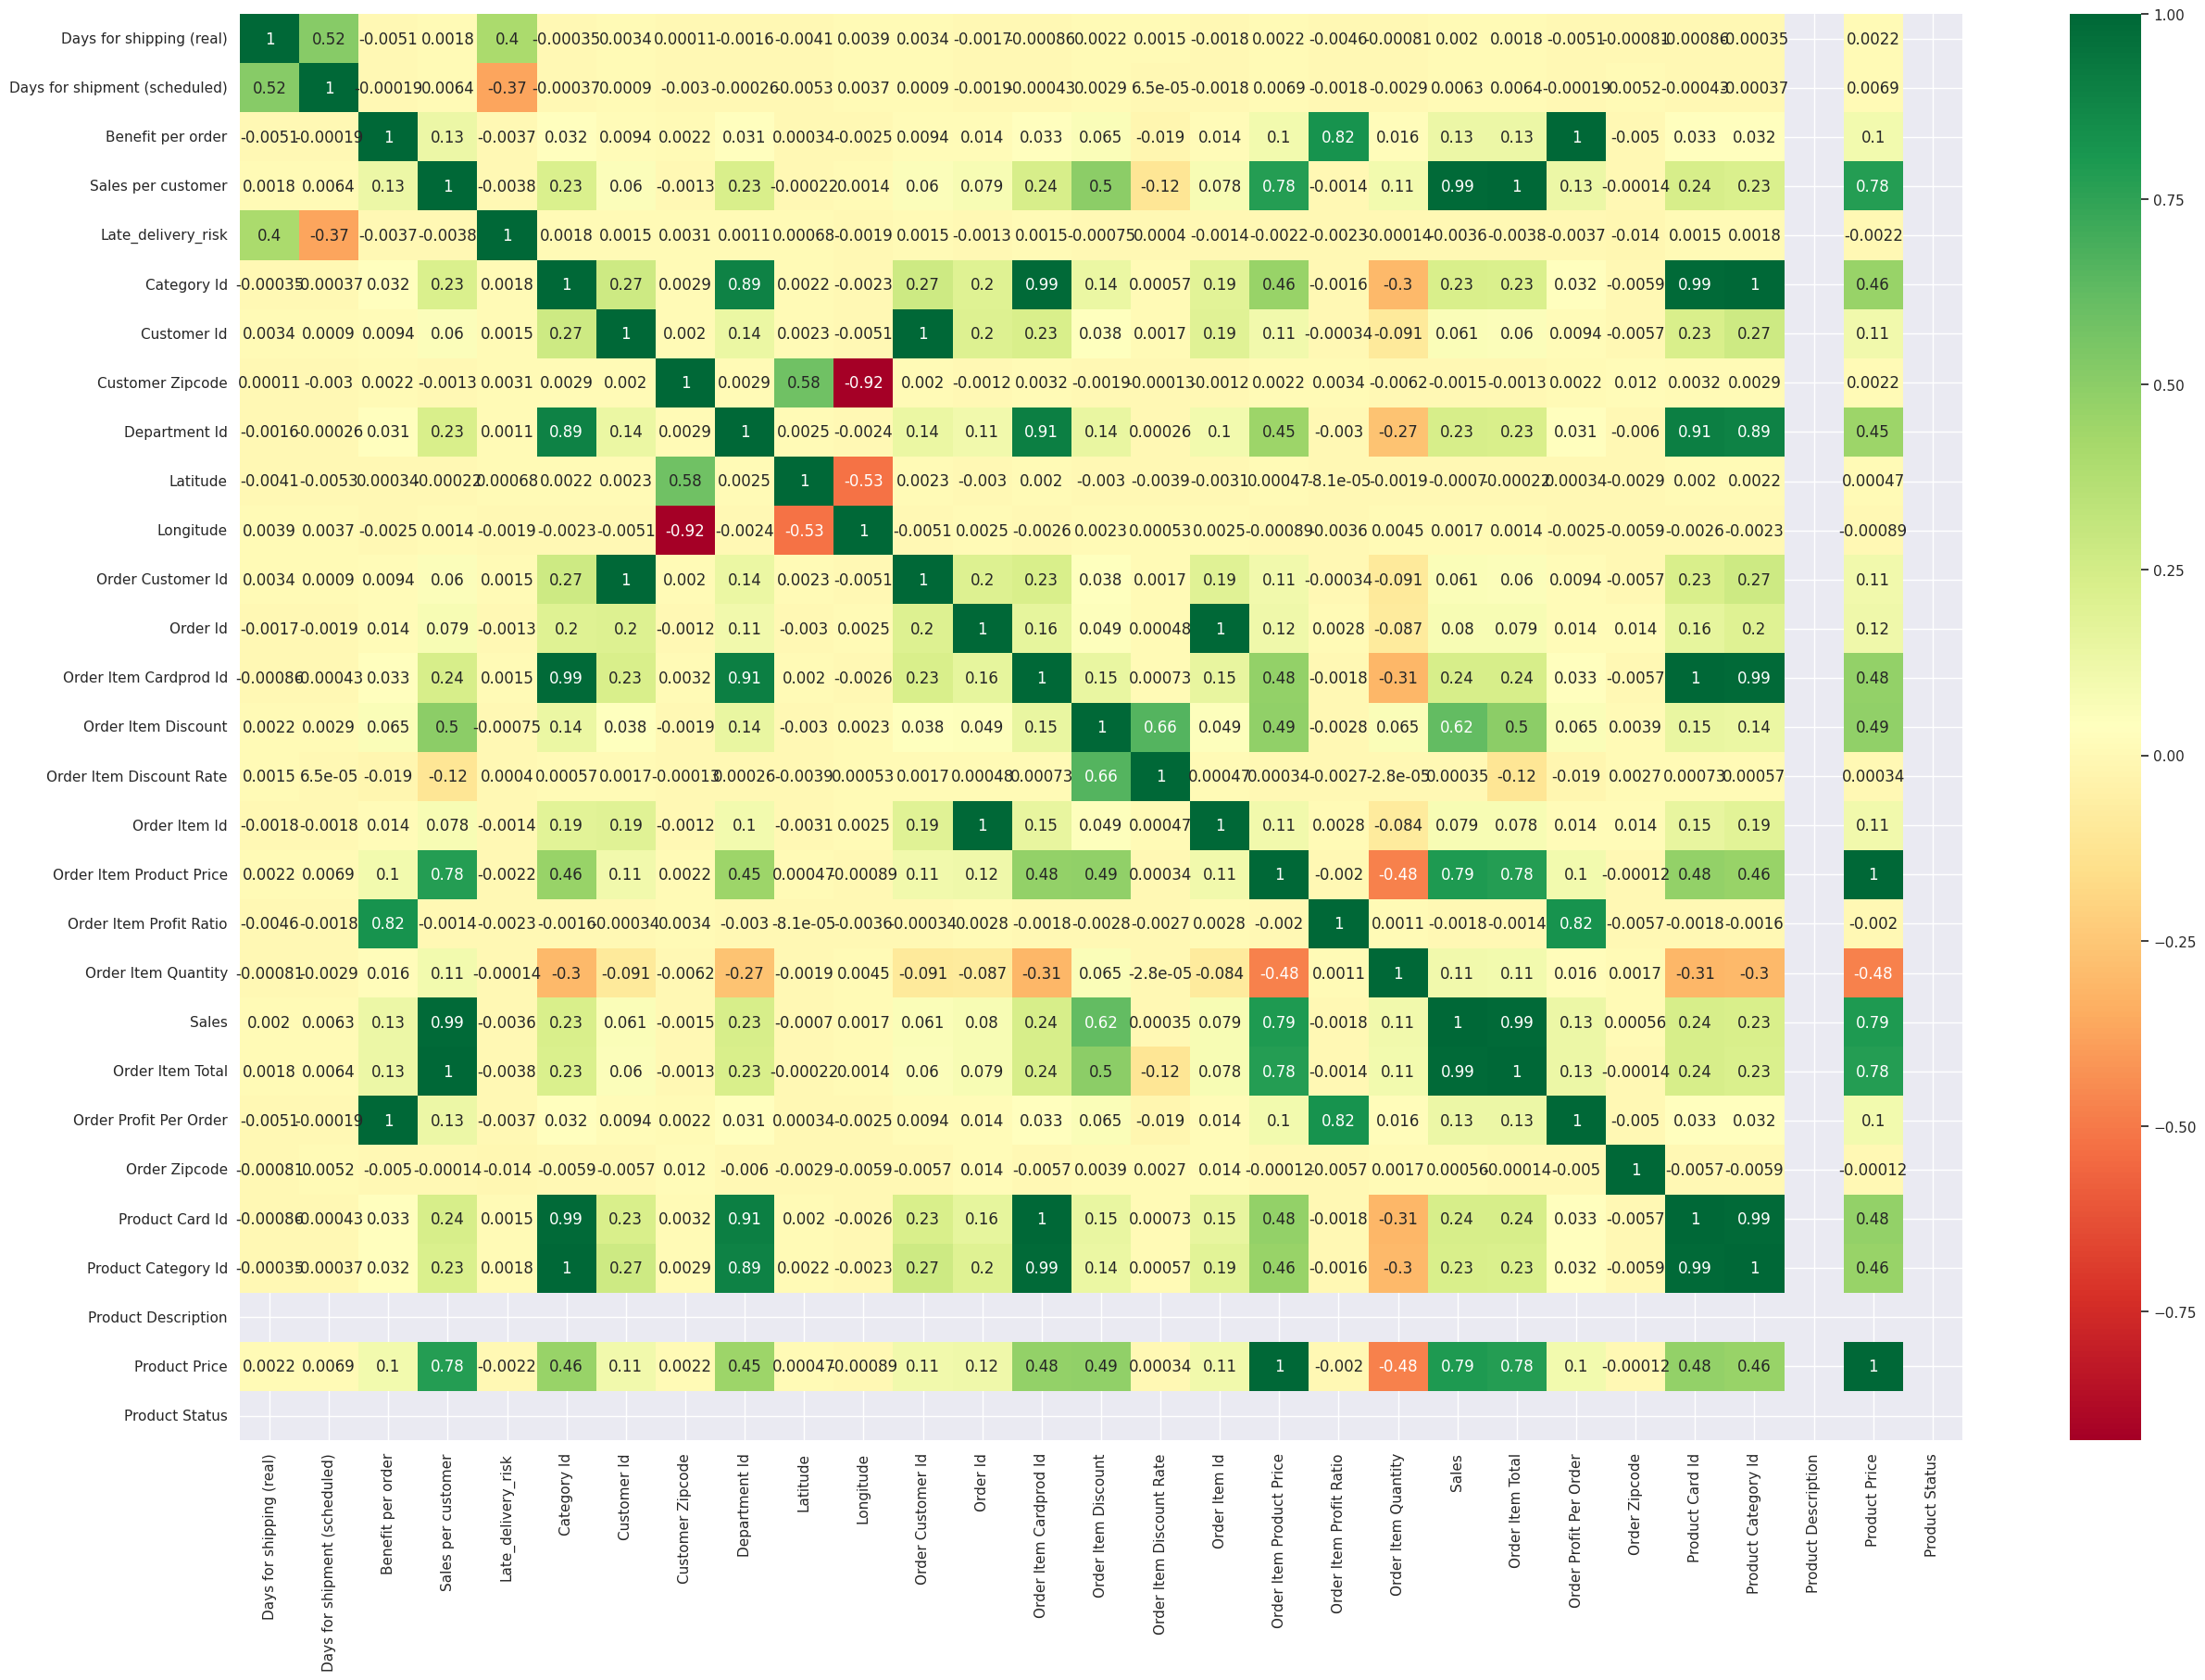

In [13]:
corrmap = data.select_dtypes(include=np.number).corr()
top=corrmap.index
plt.figure(figsize=(30,20))
g=sns.heatmap(data[top].corr(),annot=True,cmap="RdYlGn")

## Insights from Heatmap:
**1. Columns that are similar with same values but with different metadata (duplicate columns)**
  * [Benefit per order], Order Profit per order
  * [Sales per customer], Sales, Order Item Total
  * [Category ID], Product Category ID, Order Customer ID, Order Item Category ID, Product card ID,
  * [Order Item Product Price],Product Price
  

비슷한 값을 가지고 있는 컬럼들 -> 다중공선성 문제가 있으므로 모델링에 영향을 줌 삭제하는 것이 좋음


**2. Unwanted features(null or less correlated values)**
  * Product Description
  * Product Status


필요없는 특성 상품 설명, 상태는 모델 학습에 도움이 되지 않는 노이즈

1. 중복 열 (Duplicate columns)
"비슷한 값을 가진 중복 열들"

[Benefit per order], Order Profit per order (주문 당 이익)

[Sales per customer], Sales, Order Item Total (매출)

[Category ID], Product Category ID, ... (각종 ID)

[Order Item Product Price], Product Price (상품 가격)

해석: 히트맵에서 이 변수들끼리 상관관계가 0.9 ~ 1.0에 가깝게 (매우 진한 색으로) 나왔을 것입니다.

이는 '다중공선성(Multicollinearity)' 문제가 있다는 뜻입니다. 쉽게 말해, 거의 똑같은 의미를 가진 변수들이 여러 개 중복되어 있는 것입니다.

왜 문제인가요?

불필요한 중복: 모델에게 똑같은 정보를 여러 번 주는 셈입니다.

모델 불안정: 일부 모델(특히 선형 회귀)은 중복된 변수들 때문에 성능이 나빠지거나, 어떤 변수가 중요한지 해석하기 어려워집니다.

어떻게 해야 하나요?

각 그룹에서 가장 대표적인 변수 1개만 남기고 나머지는 제거합니다.

예: [Sales per customer], Sales, Order Item Total 중에서 Sales 하나만 남기고 나머지는 삭제합니다.

모든 ID 열(... ID)은 예측에 도움이 안 되는 단순 식별자인 경우가 많으므로, 대부분 삭제합니다.

2. 불필요한 특성 (Unwanted features)
"필요 없는 특성 (Null 값이 많거나 상관관계가 낮은 값)"

Product Description (상품 설명)

Product Status (상품 상태)

해석: 이 변수들은 모델 학습에 **도움이 되지 않는 '노이즈(Noise)'**일 가능성이 높습니다.

Product Description (상품 설명)

이것은 텍스트(Text) 데이터입니다. 텍스트 자체는 히트맵(숫자 상관관계)에 포함될 수 없습니다.

분석가가 "필요 없다"고 판단한 이유는, (1) 이 열의 값이 대부분 비어있거나(Null), (2) 텍스트를 숫자로 변환하는 복잡한 과정(NLP)을 거치지 않는 한 분석에 바로 쓸 수 없기 때문입니다.

Product Status (상품 상태)

"상관관계가 낮다(less correlated)"는 것은, 이 변수가 우리가 예측하려는 **타겟 변수(Target)**나 다른 중요한 변수들과 아무런 관계가 없음을 의미합니다. (히트맵에서 거의 0에 가까운 연한 색으로 표시됨)

또는 이 열 역시 Product Description처럼 값이 대부분 비어있을(Null) 수 있습니다.

어떻게 해야 하나요?

예측에 도움이 되지 않으므로 **데이터셋에서 제거(Drop)**합니다.

**Splitting dataset into smaller datasets for domain usage and easier modelling**
1. Finance
2. Demographics
3. Shipment day estimation

도메인 분리?

1. 금융: 돈과 관련된 모든 것
2. 고객 분석용: 사람관련
3. 물류 분석용 물류 흐름

In [14]:
shipment_features = ['Type','Days for shipping (real)','Days for shipment (scheduled)','Late_delivery_risk','Benefit per order',
                        'Sales per customer','Latitude','Longitude','Shipping Mode','Order Status','Order Region',
                        'Order Country','Order City','Market','Delivery Status']
shipment = data[shipment_features]
shipment.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Late_delivery_risk,Benefit per order,Sales per customer,Latitude,Longitude,Shipping Mode,Order Status,Order Region,Order Country,Order City,Market,Delivery Status
0,DEBIT,3,4,0,91.250000,314.640015,18.251453,-66.037056,Standard Class,COMPLETE,Southeast Asia,Indonesia,Bekasi,Pacific Asia,Advance shipping
1,TRANSFER,5,4,1,-249.089996,311.359985,18.279451,-66.037064,Standard Class,PENDING,South Asia,India,Bikaner,Pacific Asia,Late delivery
2,CASH,4,4,0,-247.779999,309.720001,37.292233,-121.881279,Standard Class,CLOSED,South Asia,India,Bikaner,Pacific Asia,Shipping on time
3,DEBIT,3,4,0,22.860001,304.809998,34.125946,-118.291016,Standard Class,COMPLETE,Oceania,Australia,Townsville,Pacific Asia,Advance shipping
4,PAYMENT,2,4,0,134.210007,298.250000,18.253769,-66.037048,Standard Class,PENDING_PAYMENT,Oceania,Australia,Townsville,Pacific Asia,Advance shipping


In [15]:
finance_features=['Benefit per order','Sales per customer','Order Item Discount','Order Item Discount Rate',
                  'Order Item Product Price','Order Item Profit Ratio']
finance = data[finance_features]
finance.head()

,Benefit per order,Sales per customer,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio
0,91.250000,314.640015,13.110000,0.04,327.75,0.29
1,-249.089996,311.359985,16.389999,0.05,327.75,-0.80
2,-247.779999,309.720001,18.030001,0.06,327.75,-0.80
3,22.860001,304.809998,22.940001,0.07,327.75,0.08
4,134.210007,298.250000,29.500000,0.09,327.75,0.45


shipment, finance data frame을 다시 만들어줌

# 5) FEATURE ENGINEERING

In [16]:
#Converting categorical features that represent date and time to datetime datatype.
data['order_date'] = pd.to_datetime(data['order date (DateOrders)'])
data['shipping_date']=pd.to_datetime(data['shipping date (DateOrders)'])

컬럼 order date (DateOrders)을 pd.to_datetime()함수로 datetime형식으로 변환, order_date라는 새로운 열에 저장

날짜 데이터 타입으로 바뀐 뒤에 두 날짜 사이의 차이를 계산할 수 있게 됨

In [17]:
# Handling Time and date variables
data['order_year'] = pd.DatetimeIndex(data['order_date']).year
data['order_month'] = pd.DatetimeIndex(data['order_date']).month
data['order_day'] = pd.DatetimeIndex(data['order_date']).day
data['shipping_year'] = pd.DatetimeIndex(data['shipping_date']).year
data['shipping_month'] = pd.DatetimeIndex(data['shipping_date']).month
data['shipping_day'] = pd.DatetimeIndex(data['shipping_date']).day

In [18]:
new_dataset_features = ['Type','Days for shipping (real)','Days for shipment (scheduled)','Late_delivery_risk','Benefit per order',
                        'Sales per customer','Latitude','Longitude','Shipping Mode','Order Status','Order Region',
                        'Order Country','Order City','Market','Delivery Status','order_day','order_month','order_year',
                        'shipping_day','shipping_month','shipping_year']
len(new_dataset_features)

21

In [19]:
new_data = data[new_dataset_features]
model_data = new_data
new_data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Late_delivery_risk,Benefit per order,Sales per customer,Latitude,Longitude,Shipping Mode,Order Status,Order Region,Order Country,Order City,Market,Delivery Status,order_day,order_month,order_year,shipping_day,shipping_month,shipping_year
0,DEBIT,3,4,0,91.250000,314.640015,18.251453,-66.037056,Standard Class,COMPLETE,Southeast Asia,Indonesia,Bekasi,Pacific Asia,Advance shipping,31,1,2018,3,2,2018
1,TRANSFER,5,4,1,-249.089996,311.359985,18.279451,-66.037064,Standard Class,PENDING,South Asia,India,Bikaner,Pacific Asia,Late delivery,13,1,2018,18,1,2018
2,CASH,4,4,0,-247.779999,309.720001,37.292233,-121.881279,Standard Class,CLOSED,South Asia,India,Bikaner,Pacific Asia,Shipping on time,13,1,2018,17,1,2018
3,DEBIT,3,4,0,22.860001,304.809998,34.125946,-118.291016,Standard Class,COMPLETE,Oceania,Australia,Townsville,Pacific Asia,Advance shipping,13,1,2018,16,1,2018
4,PAYMENT,2,4,0,134.210007,298.250000,18.253769,-66.037048,Standard Class,PENDING_PAYMENT,Oceania,Australia,Townsville,Pacific Asia,Advance shipping,13,1,2018,15,1,2018


In [42]:
#One-Hot encoding categotical variables in the data
model_data = pd.get_dummies(model_data)
model_data.shape

print(list(model_data.columns))


['Days for shipping (real)', 'Days for shipment (scheduled)', 'Late_delivery_risk', 'Benefit per order', 'Sales per customer', 'Latitude', 'Longitude', 'order_day', 'order_month', 'order_year', 'shipping_day', 'shipping_month', 'shipping_year', 'Type_CASH', 'Type_DEBIT', 'Type_PAYMENT', 'Type_TRANSFER', 'Shipping Mode_First Class', 'Shipping Mode_Same Day', 'Shipping Mode_Second Class', 'Shipping Mode_Standard Class', 'Order Status_CANCELED', 'Order Status_CLOSED', 'Order Status_COMPLETE', 'Order Status_ON_HOLD', 'Order Status_PAYMENT_REVIEW', 'Order Status_PENDING', 'Order Status_PENDING_PAYMENT', 'Order Status_PROCESSING', 'Order Status_SUSPECTED_FRAUD', 'Order Region_Canada', 'Order Region_Caribbean', 'Order Region_Central Africa', 'Order Region_Central America', 'Order Region_Central Asia', 'Order Region_East Africa', 'Order Region_East of USA', 'Order Region_Eastern Asia', 'Order Region_Eastern Europe', 'Order Region_North Africa', 'Order Region_Northern Europe', 'Order Region_Oce

?? 열의 개수가 왤케 많아진거야

model_data = pd.get_dummies(model_data)를 보니 model_data에서 문자열 열들을 찾아서 숫자 0과1로 이루어진 여러 개의 열로 변환

city에 jeju와 ulsan이 있었다면 pd.get_dummies(model_data) 이후에는 city_jeju 이라는 새로운 컬럼 생성 후 0,1로 표기 모든 도시에 대해 0과 1로 출력(0과1로 변환하는 것: one-hot encoding)

ML model은 텍스트 데이터를 직접 이해하지 못하므로

# 6) MODEL BUILDING:

**목표 정의**

* Target features : Days for shipping (real), Days for shipment (scheduled)

최종적으로 예측하고 싶은 값: 실제 배송일, 계획된 배송일
* Problem type : Multi-output Regression

배송일 처럼 연속적인 숫자를 예측하는 문제(regression)이며 타겟이 실제 배송일, 계획된 배송일 2개 이상이기 때문에 multo output임

regression(회귀): 숫자를 예측하는데 사용되는 핵심적인 방법론

**x,y분리**

피쳐와 타겟을 분리

axis=1 열을 기준으로

drop하는 이유: 모델이 training중에 정답을 컨닝하지 못하도록

모델이 training을 마친 후 실제 값과 얼마나 비슷한지 채점하기 위해 y_test라는 실제 정답지와 나중에 비교함

In [21]:
x = model_data.drop(['Days for shipping (real)','Days for shipment (scheduled)'],axis=1)
y = model_data[['Days for shipping (real)','Days for shipment (scheduled)']]
x.shape,y.shape


((180519, 3821), (180519, 2))

y는 정답지가 되고 x는 모델을 돌릴 바탕이 됨

In [22]:
# train-test_split
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size=0.20)

모델을 학습시킬 때 데이터 전부를 학습에 사용하면 안됨 모델이 데이터를 그냥 통째로 외워버려서 새로운 데이터가 왔을 때 전혀 예측을 못할 수 있음

?? what is that meaning..


과적합: 모델이 훈련 데이터를 완벽하게 외워버려서 그 데이터에만 존재하는 사소한 특징이나 오류(노이즈)까지 전부학습

일반화: 일정 비율의 데이터를 학습하도록하고 나머지 학습하지 않은 데이터에 대해 예측하도록 함
이 예측이 얼마나 잘 맞았나를 평가하는 지표는  accuracy(분류: 몇 개를 맞췄나?) MAE(회귀:얼마나 가까이 맞췄나?)


과적합: 훈련데이터에만 지나치게 잘 맞도록 학습. 새로운 데이터에 대해서 성능이 급격히 떨어짐


여기서는 test_size=0.20이라 했으니 전체 데이터 중 20%를 시험용으로 떼어놓음

In [23]:
#sc=StandardScaler()
#No standard Scaling is not required for Decision Trees are tree-based algorithms and do not need normalization or standard scaling
#pc=PCA()
# The hyper-parameters used are default hyper-parameters
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
pred=model.predict(x_test)

standardscaler(스케일링)이나 PCA(차원축소) 같은 데이터 전처리를 하지 않음 왜냐면 데이터의 대소 관계를 기반으로 작동하기 떄문에 스케일링이 굳이 필요하지 않음

decision tree(의사결정나무) 회귀 모델을 만들고 훈련 시킨 뒤 예측 수행

랜덤포레스트: 수많은 의사결정 나무들의 숲

# 7) MODEL EVALUATION

In [24]:
#Function for estimating r2_score, mean_squared_error, mean_absolute_error
def metrics(y_test,pred):
    a =r2_score(y_test,pred)
    b =mean_squared_error(y_test,pred)
    c =mean_absolute_error(y_test,pred)
    print('The r-squared score of the model is ',a)
    print('The mean squared error is',b)
    print('The mean accuracy score is',c)

y_test: 시험 정답지
pred: 모델이 품 답안지

a=r2_score(y_test,pred)
: R-squared(결정계수) 점수를 계산 이 점수는 모델이 데이터의 변동성을 몇 퍼센트나 잘 설명해내는지를 0에서1사이의 값으로 보여줌

1에 가까울수록 좋음

b=mean_squared_error
: MSE 오차의 절댓값에 평균을 낸 값

숫자가 작을수록 좋음

c= mean_absolute_error
:MAE 평균 절대 오차 오차의 절댓값에 평균을 낸 값

In [25]:
metrics(y_test,pred)
#from sklearn.model_selection import cross_validate
#cv_results = cross_validate(clf,x,y,cv=4)
#cv_results {NO sufficient RAM space in Kaggle Kernel to run the CROSS-VALIDATION TESTS}

The r-squared score of the model is  0.9925733695683004
The mean squared error is 0.019499224462663417
The mean accuracy score is 0.01703412364280966


너무 좋은 값들 -> 과적합임 ;;

cross validation이 필요해 보임(과적합을 잡아내기 위한 테스트)

# 8) PREDICTIVE ANALYTICS : Late_delivery_prediction

In [26]:
#Converting the predicted output array to dataframe
Prediction = pd.DataFrame(pred)
prediction = Prediction.rename(columns={0:'Fastest_shipment',1:'Avg_shipment'})
prediction.head()

,Fastest_shipment,Avg_shipment
0,2.0,4.0
1,3.0,4.0
2,6.0,2.0
3,2.0,1.0
4,2.0,1.0


예측한 결과를 표로 만듦

* Using Fastest product shipment and Normal shipment duration(in days) features from predictions
* Risk in delivery is a feature that highly corresponds and correlates to Fastest Shipment and Avg_shipment duration in days. If the fastest shipment duration is greater than avg_shipment, then late delivery risk is heavier as the scheduled days are outnumbered. Similarly, if avg_shipment values are greater than former, then there is a high probability for FAST/EARLY delivery of goods to customers

In [27]:
# Statiscal modelling
prediction['risk'] = np.where(prediction['Avg_shipment'] >= prediction['Fastest_shipment'],0,1)

In [28]:
prediction.head()

,Fastest_shipment,Avg_shipment,risk
0,2.0,4.0,0
1,3.0,4.0,0
2,6.0,2.0,1
3,2.0,1.0,1
4,2.0,1.0,1


In [29]:
l = prediction['risk']
m = x_test['Late_delivery_risk']
l.shape,m.shape

((36104,), (36104,))

# Classification Model Evaluation

In [30]:
# Defining a function to evaluate our statiscal model for Late_delivery_risk_prediction
def evaluation_risk_factor(l,m):
  print('1) The accuracy of the risk predictor model is :',accuracy_score(l,m))
  print('2) The AUROC score is :',roc_auc_score(l,m))
  print('3) Some of the key classification metrics are :')
  print(classification_report(l,m))
  ax=plt.subplot()
  sns.heatmap(confusion_matrix(l,m),annot=True,ax=ax);
  ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels')
  ax.set_title('Confusion matrix for Risk Delivery classfication');

1) The accuracy of the risk predictor model is : 0.9753766895634832
2) The AUROC score is : 0.9784233775059463
3) Some of the key classification metrics are :
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     15503
           1       1.00      0.96      0.98     20601

    accuracy                           0.98     36104
   macro avg       0.97      0.98      0.98     36104
weighted avg       0.98      0.98      0.98     36104



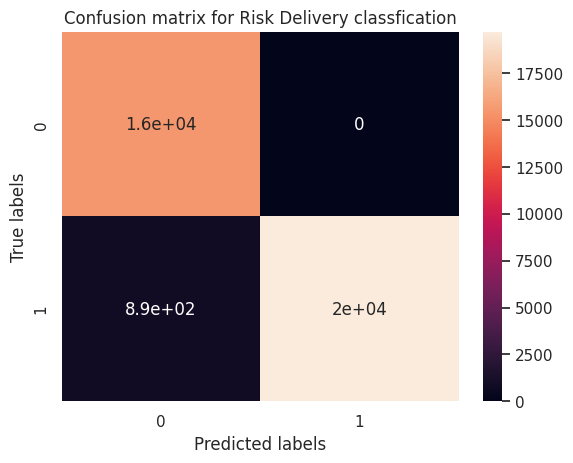

In [31]:
evaluation_risk_factor(l,m)

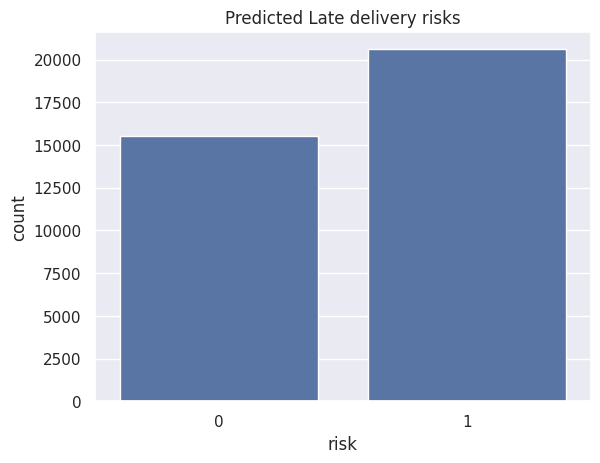

In [32]:
sns.set(style="darkgrid")
ax=sns.countplot(x="risk",data=prediction).set_title('Predicted Late delivery risks')

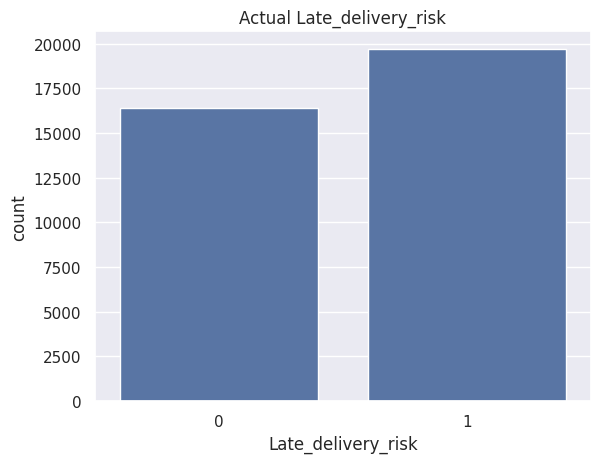

In [33]:
bx=sns.countplot(x='Late_delivery_risk',data=x_test).set_title('Actual Late_delivery_risk')

# Saving the trained regression model to pickle file

In [34]:
filename = 'Shipping_duration_estimator.pkl'
pickle.dump(model,open(filename,'wb'))